# GOAL: Build a mini-app to accelerate how to find the best apartment

This Python labs sessions has one objective, build a data science solution which  answers this question: where are the best apartment/houses based on some characteristics. Among the activities : 
* will learn/consolidate how to do web scraping **(it assumes you worked on the prposed tutorials at the previous sessions)**
* will use pandas **(to organize the data)**
* will create features to give actionable insights **(distance to beach, criminality...)**
* will learn how to visualize **(histograms, box-plots)**
* will learn how to create a *mini-app*

* **NO** dangling code & NO functions without comments

* Good practices when writing variable names
 - **LINTING:** https://realpython.com/python-code-quality/
 - **VERSION CONTROL:** CODE must be sync'ed with Github 

If you have followed the previous tutorials you should be able to understand the code below:

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 2.8 MB/s 
     |████████████████████████████████| 359 kB 31.5 MB/s 
     |████████████████████████████████| 138 kB 15.3 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 4.0 MB 41.7 MB/s 
     |████████████████████████████████| 58 kB 4.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://c

In [4]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [5]:
wd = webdriver.Chrome('chromedriver', options=chrome_options)
res = wd.get("https://www.zillow.com/homes/for_rent/?searchQueryState=%7B%22mapBounds%22%3A%7B%22west%22%3A-117.28203672784423%2C%22east%22%3A-117.19406027215575%2C%22south%22%3A32.7746319816297%2C%22north%22%3A32.82405263546272%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22price%22%3A%7B%22min%22%3A0%2C%22max%22%3A832043%7D%2C%22mp%22%3A%7B%22min%22%3A0%2C%22max%22%3A3500%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A14%7D")

In [6]:
driver.page_source

'<html><head></head><body></body></html>'

Is selenium working ? Please explain

please setup a fake email account:
https://temp-mail.org/fr/
and **sign in Zillow**

**WARNING:**
When you perform webscraping there are aspects you must have in mind:
* do not send too many requests from your own computer (add a **time.sleep**)
* we can use **AWS lambda functions** to do crawling as the IP changes at each launch
* we can also use **IP rotation**
* headless Selenium is easily detected by websites like Facebook (as potential bots)
* Methods against us (cat and mouse):
👉 https://www.scraping-bot.io/anti-scraping-methods/
👉 https://stackoverflow.com/questions/54984185/webpage-is-detecting-selenium-webdriver-with-chromedriver-as-a-bot

# Step 1: Analysis of Zillow

You must ask yourself:

* What is an API ?
- please check : data.gouv
*   "Is there any API ?" (check the availability)
*   "is there an easy structure (html/css) to help scraping?"

the main page has a searchbox
* how do you send commands to a searchbox ?
* how do you make sure that you keep track of the window / (in theory vs in this case ?)
* what. about "seloger.fr" ?
* is it the only way to access the data ?


what information can you extract ?
  zillow.com/homes/for_rent/?searchQueryState=%7B"pagination"%3A%7B%7D%2C"mapBounds"%3A%7B"west"%3A-119.57072509765625%2C"east"%3A-114.70927490234375%2C"south"%3A31.210330412499946%2C"north"%3A34.372794188002125%7D%2C"isMapVisible"%3Atrue%2C"filterState"%3A%7B"fsba"%3A%7B"value"%3Afalse%7D%2C"fsbo"%3A%7B"value"%3Afalse%7D%2C"nc"%3A%7B"value"%3Afalse%7D%2C"fore"%3A%7B"value"%3Afalse%7D%2C"cmsn"%3A%7B"value"%3Afalse%7D%2C"auc"%3A%7B"value"%3Afalse%7D%2C"fr"%3A%7B"value"%3Atrue%7D%2C"ah"%3A%7B"value"%3Atrue%7D%2C"mp"%3A%7B"max"%3A3500%7D%2C"price"%3A%7B"max"%3A832043%7D%7D%2C"isListVisible"%3Atrue%2C"mapZoom"%3A8%7D
  

### You can try to click on the website to understand:
* what is the **pagination** ?
* if you sort data by **increasing** or **descending order** - what do you see in the url ? what are the categories of appartements Zillow has created ?


## TL:DR - Scraping is hard.
Selenium is not always the solution and  you might have to be inventive. <br>
👉
Because of this lab we will use:
* **webscraper.io** 
* **this tutorial**:
https://medium.com/fortune-for-future/how-to-scrape-zillow-data-for-free-without-writing-any-code-be2ac698e604#:~:text=Click%20%E2%80%9CSitemap%20zillow%E2%80%9D%20in%20the,load%20it%20into%20your%20spreadsheet.



 Here is the json document u will use to extract **all listings** for 1 page and generalize for **n pages**

{
    "_id": "forum-zillow-2021-e",
    "startUrl": [
        "https://www.zillow.com/pacific-beach-san-diego-ca/rentals/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22west%22%3A-117.55014065786041%2C%22east%22%3A-117.12854031606354%2C%22south%22%3A32.77951971643358%2C%22north%22%3A32.869533572035685%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A117156%2C%22regionType%22%3A8%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%7D"
    ],
    "selectors": [

        {
            "id": "Separate scroller",
            "type": "SelectorElementScroll",
            "parentSelectors": [
                "_root"
            ],
            "selector": "div#grid-search-results > ul > li:nth-of-type(2n+3)",
            "multiple": true,
            "delay": "2500",
            "scrollElementSelector": "div.search-page-list-container"
        },
        {
            "id": "Item wrappers",
            "type": "SelectorElement",
            "parentSelectors": [
                "_root"
            ],
            "selector": "div#grid-search-results > ul > li",
            "multiple": true
        },
        {
            "id": "Price",
            "type": "SelectorText",
            "parentSelectors": [
                "Item wrappers"
            ],
            "selector": "div.list-card-price",
            "multiple": false,
            "regex": ""
        },
        {
            "id": "Details",
            "type": "SelectorText",
            "parentSelectors": [
                "Item wrappers"
            ],
            "selector": "ul.list-card-details",
            "multiple": false,
            "regex": ""
        },
        {
            "id": "Link",
            "type": "SelectorElementAttribute",
            "parentSelectors": [
                "Item wrappers"
            ],
            "selector": "a.list-card-link",
            "multiple": false,
            "extractAttribute": "href"
        }
    ]
}
   

Now we have all listings (page webs), we still need to get the information, for that we are going to instruct the computer to scroll down and capture the text until we are able to extract  all the information we need.

For time constraints (making the scraper getting elements we are going to use a *quick fix* 

for that end we will need: **autogui** + **Pytesseract** + **Opencv**

In [10]:
import pyautogui
import numpy as np
pyautogui.moveTo(100, 100, duration=0.25)

C:\Users\Quentin\anaconda3\envs\webscrapping\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  
C:\Users\Quentin\anaconda3\envs\webscrapping\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  


array([], shape=(0, 0), dtype=uint8)

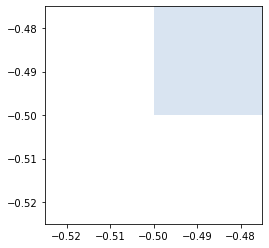

In [12]:
# simple example with opencv
import matplotlib.pyplot as plt
img = plt.imread("calc7key.png") # open an image
img_uint8 = (img*255).astype(np.uint8) # convert the image to uint8
plt.imshow(img_uint8) # display the image

img_uint8[270:310, 350:450,:3].shape # "zoom"on the borders
plt.imshow(img_uint8[270:310, 350:450,1])
img_uint8[270:310, 350:450,:3][20:30,20:30,1]

# Step 2:  Data collection

### What  data are you going to collect ?
* The MOST important feature is the proximity to the ocean (what feature are you going to consider?)
* Should we limit the search with parameters of get all data and filter later on
  - what are the consequences ?
* On Zillow websites the headlines are **not acurate**  (=apartments listings not available in reality)
* In the US, individuals pick their housing based on the **quality of the nearby schools **. where do you get this information ?
** https://www.greatschools.org/california/san-diego/schools/
* What about getting details about **walk-friendliness** (what feature are you going to extract?)
* What about getting details about the **zone accesibility by car** (where should I look ?)
* Are you going to collect unstructured data ? **(if yes how?)** 


# Step 3: Features creation

In [ ]:
# HOW-TO-PANDAS:
# https://www.youtube.com/watch?v=CmorAWRsCAw&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy 

👉   we need to build analytics:
* premium appartments **(what makes an appartment premium ?)**
- can you derive a data-based feature?


👉 we **cannot have lists** inside a cell of a pandas dataframe if we want to use them in a ML model
* there is quite some free-text how can be convert or extract elements of interest ?
- can you derive a data-based features?

In [ ]:
# MUST WATCH: https://www.youtube.com/playlist?list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX
# https://spacy.io/usage/linguistic-features
# https://regex101.com/


# Step 4: Build a ML solution

In [ ]:
# HOW-TO-ML: 
# scikit-learn - ABC of ML: https://www.youtube.com/watch?v=pqNCD_5r0IU&t=617s
# how-to-compare models: https://www.youtube.com/watch?v=0pP4EwWJgIU
# spacy - nlp: https://www.youtube.com/watch?v=7PD48PFL9VQ

In all ML problems, you will have:
1. training set
2. validation set (optional)
3. test set


- on the "training set" you **train your model**
- on the "validation set" you **optimize your model**
- on the "test set" **you evaluate the peformance**



### a.How are you going to separate your dataset ?
* is the test set distribution similar to **the train set ?**

### b. How is your dataset ? balanced not balanced ?
* is it a problem ?
* what can you do ?

### c.What type of ML model are you going to build ?
* regression
* classification
* cluster

### d. Build your model

In [ ]:
# HOW-TO-ML: 
# ADVANCED:  https://www.youtube.com/watch?v=p_7hJvl7P2A
# ADVANCED (pipelines I): https://www.youtube.com/watch?v=xIqX1dqcNbY
# ADVANCED (pipelines II): https://www.youtube.com/watch?v=jzKSAeJpC6s


# Step 5. Visualize

In [ ]:
# https://positionstack.com/ (longitude-latitude data)
# plotly - https://plotly.com/python/scattermapbox/
# https://streamlit.io/  (build app)